<a href="https://colab.research.google.com/github/akash-singh-10/Deep-Learning/blob/main/DLA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

In [127]:
data = np.load('cifar10.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [112]:
x_train = x_train/255
x_test = x_test/255

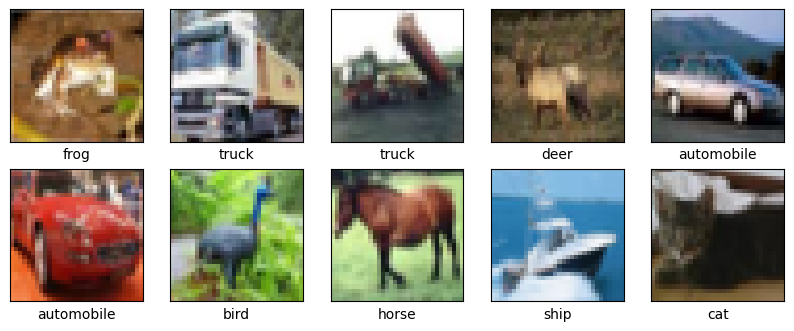

In [113]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [114]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 1024)             

In [115]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [116]:
h = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5166 - accuracy: 0.4521 - val_loss: 1.2664 - val_accuracy: 0.5393
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1494 - accuracy: 0.5929 - val_loss: 1.0889 - val_accuracy: 0.6154
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9924 - accuracy: 0.6514 - val_loss: 0.9714 - val_accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8923 - accuracy: 0.6864 - val_loss: 0.9083 - val_accuracy: 0.6822
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8161 - accuracy: 0.7111 - val_loss: 0.9099 - val_accuracy: 0.6868
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7554 - accuracy: 0.7349 - val_loss: 0.8526 - val_accuracy: 0.7044
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7028 - accuracy: 0.7525 - val_loss: 0.8671 -

In [117]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.8947 - accuracy: 0.7064
0.8946807384490967
0.7063999772071838


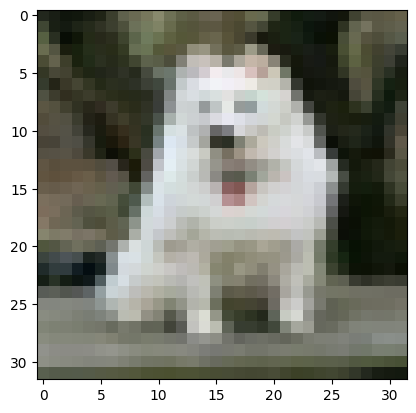

In [122]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [123]:
predicted_value = model.predict(x_test)
print(class_names[np.argmax(predicted_value[n])])

313/313 [==============================] - 4s 12ms/step
dog


In [124]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

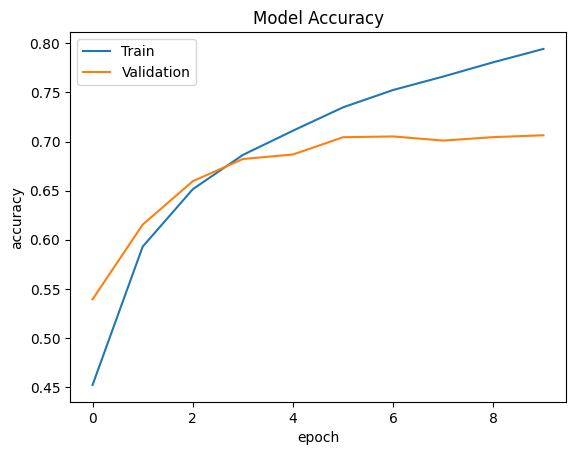

In [125]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

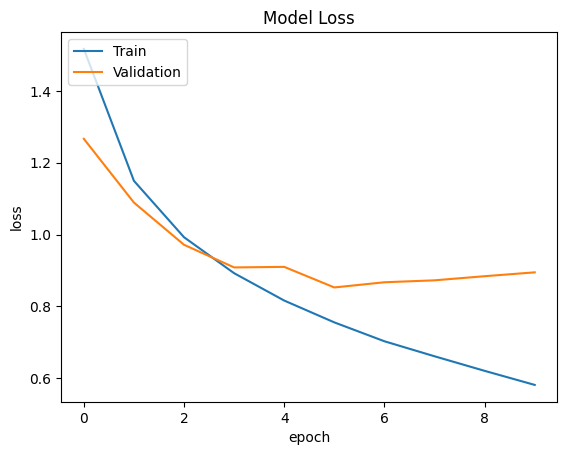

In [126]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()